# Learning the topology of a Bayesian network from a database of cases using the K2 algorithm
### Advanced Statistics for Physical Analysis @ Physics of Data, UniPD - 29/7/2019
#### Chimenti Alberto, Frazzetto Paolo, Vincenzo Schimmenti
---

## Import and Update Packages

In [ ]:
# Install the required packages 

install.packages('bnstruct', repo="https://cran.stat.unipd.it/")
install.packages('bnlearn', repo="https://cran.stat.unipd.it/")

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()

BiocManager::install(c("graph", "Rgraphviz"))

package 'bnstruct' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpSCCIIS\downloaded_packages


In [1]:
update.packages(ask = FALSE) # uncomment to update all


  There are binary versions available but the source versions are later:
          binary source needs_compilation
foreach    1.4.4  1.4.7             FALSE
iterators 1.0.10 1.0.12             FALSE



Warning message:
"package 'formatR' is in use and will not be installed"

package 'askpass' successfully unpacked and MD5 sums checked
package 'boot' successfully unpacked and MD5 sums checked
package 'callr' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'clipr' successfully unpacked and MD5 sums checked
package 'cluster' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'dbplyr' successfully unpacked and MD5 sums checked
package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"

package 'dplyr' successfully unpacked and MD5 sums checked
package 'ellipsis' successfully unpacked and MD5 sums checked
package 'evaluate' successfully unpacked and MD5 sums checked
package 'fs' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'hexbin' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'IRkernel' successfully unpacked and MD5 sums checked
package 'knitr' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 su

Warning message:
"cannot remove prior installation of package 'Rcpp'"

package 'recipes' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked
package 'reprex' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'rmarkdown' successfully unpacked and MD5 sums checked
package 'rvest' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tinytex' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpQRgp8H\downloaded_packages


installing the source packages 'foreach', 'iterators'



## Load Dataset

Load the basic dataset used in the handout _Illustration of the K2 Algorithm for Learning Bayes Net Structures_ by Prof. Carolina Ruiz.


In [6]:
df <- data.frame("x1" = factor(c(1,1,0,1,0,0,1,0,1,0)), "x2" = factor(c(0,1,0,1,0,1,1,0,1,0)), "x3" = factor(c(0,1,1,1,0,1,1,0,1,0)) ) # Ruiz's dataset
df

x1,x2,x3
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1
0,0,0


In [2]:
str(df)

'data.frame':	10 obs. of  3 variables:
 $ x1: Factor w/ 2 levels "0","1": 2 2 1 2 1 1 2 1 2 1
 $ x2: Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 2 1
 $ x3: Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 2 1


Alternatively, load the toy dataset _Asia_ contained in the _bnstruct_ library.
This dataset originally appeared in the paper _Local Computations with Probabilities on Graphical Structures and Their Application to Expert Systems_ by S. L. Lauritzen and D. J. Spiegelhalter (1988) and it addresses the following scenario:

>Shortness-of-breath (dyspnoea) may be due to tuberculosis, lung cancer or
 bronchitis, or none of them, or more than one of them. A recent visit to Asia
 increases the chances of tuberculosis, while smoking is known to be a risk factor
 for both lung cancer and bronchitis. The results of a single chest X-ray do not
 discriminate between lung cancer and tuberculosis, as neither does the presence
 or absence of dyspnoea.

The structure of our knowledge-base is represented by the below directed graph:
![title](Asia.png)

In [1]:
library("bnstruct")

Warning message:
"package 'bnstruct' was built under R version 3.6.1"Loading required package: bitops
Loading required package: Matrix
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
df <- asia() # loaded as BNDataset
bn.dataset <- asia() 
print(df)
layers <- c(1,2,1,2,2,3,4,4)


Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0


In [14]:
raw.data(df)

V1,V2,V3,V4,V5,V6,V7,V8
2,2,1,1,1,2,1,2
2,1,1,1,1,1,2,1
1,1,2,1,1,1,2,1
2,1,2,1,1,1,2,1
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,2,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,1,2
2,1,2,1,1,1,2,1


##  `bnstruct`

In [60]:
library("bnstruct")

In [61]:
citation("bnstruct")


To cite the bnstruct package in publications, use:

  Alberto Franzin, Francesco Sambo, Barbara di Camillo. bnstruct: an R
  package for Bayesian Network structure learning in the presence of
  missing data. Bioinformatics, 2017; 33 (8): 1250-1252, Oxford
  University Press

A BibTeX entry for LaTeX users is

  @Article{,
    title = {bnstruct: an R package for Bayesian Network structure learning in the presence of missing data},
    author = {Alberto Franzin and Francesco Sambo and Barbara di Camillo},
    journal = {Bioinformatics},
    year = {2017},
    volume = {33},
    number = {8},
    pages = {1250--1252},
    doi = {10.1093/bioinformatics/btw807},
    publisher = {Oxford University Press},
  }


In [ ]:
# ---- PREPROCESSING the Ruiz's dataset ----
# The values contained in the dataset have to be numeric (real for continuous variables, integer for discrete ones)

#df <- as.data.frame(lapply(df, as.integer))
#str(df)
#bn.dataset <- BNDataset(data = df.integer, node.sizes = rep(2,length(df.integer)), discreteness =  rep('d',length(df.integer)), variables = colnames(df))
#show(bn.dataset)
#raw.data(bn.dataset)

In [39]:
# Network Learning
net.1 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "mmhc") # Max Min Hill Climbing (default)
net.2 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "mmpc") # Max-Min Parent-and-Children 
net.3 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BDeu") # Bayesian-Dirichlet equivalent uniform (default)
net.4 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "AIC") # Akaike Information Criterion
net.5 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BIC") # Bayesian Information Criterion
net.6 <- learn.network(bn.dataset, max.parents = 2, layering = layers,
                       algo = "sm",   #  Silander-Myllymaki (exact search-and-score algorithm)
                        ) 

bnstruct :: learning the structure using MMHC ...
bnstruct :: learning using MMHC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: MMPC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.
bnstruct :: learning the structure using MMPC ...
bnstruct :: learning using MMPC completed.
bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.
bnstruct :: learning the structure using HC ...
bnstruct :: learning using HC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.
bnstruct :: learning the structure using HC ...
bnstruct :: learning using HC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.
bnstruct :: learning the structure using HC ...
bnstruct :: learning using HC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: learning the structure using SM ...
bnstruct :: learning using SM completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.


Copiato da documentazione: In terms of solution quality, the results clearly improve as the size of the
dataset grows. For 10000 observations BDeu finds slightly better networks, in
terms of similarity with the original one, than BIC, while for smaller datasets
BIC is significantly more robust.

In [40]:
dag(net.1) # Show Directed Acyclic Graph adjagency matrix

0,1,0,0,0,0,0,0
0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,1
0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0


In [41]:
cpts(net.1) # show conditional probability tables 

1,2
0.9928838,0.00711618
0.8955423,0.10445765
1,2
0.9888732,0.01112681
0.9324324,0.06756757


In [42]:
print(net.1)


Bayesian Network: BNDataset

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
Adjacency matrix:
             Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
Asia            0            1     0          0          0      0     0       0
Tubercolosys    0            0     0          0          0      1     0       0
Smoke           0            0     0          0          0      0     0       1
LungCancer      0            0     0          0          1      0     0       0
Bronchitis      0            0     0          0          0      1     0       0
Either          0            0     0          0          0      0     0       0
X-ray           0            0     0          0          0      0     0       1
Dyspnea         0            0     0          0          0      0     0       0

Conditional probability tables:$Asia
Asia
        1         2

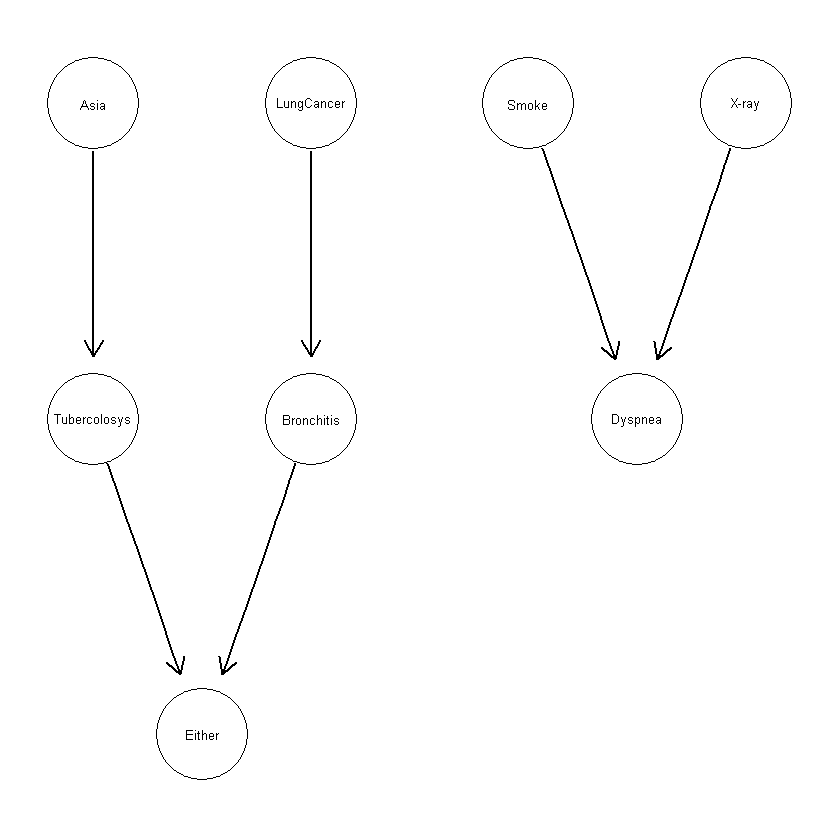

In [43]:
plot(net.1)

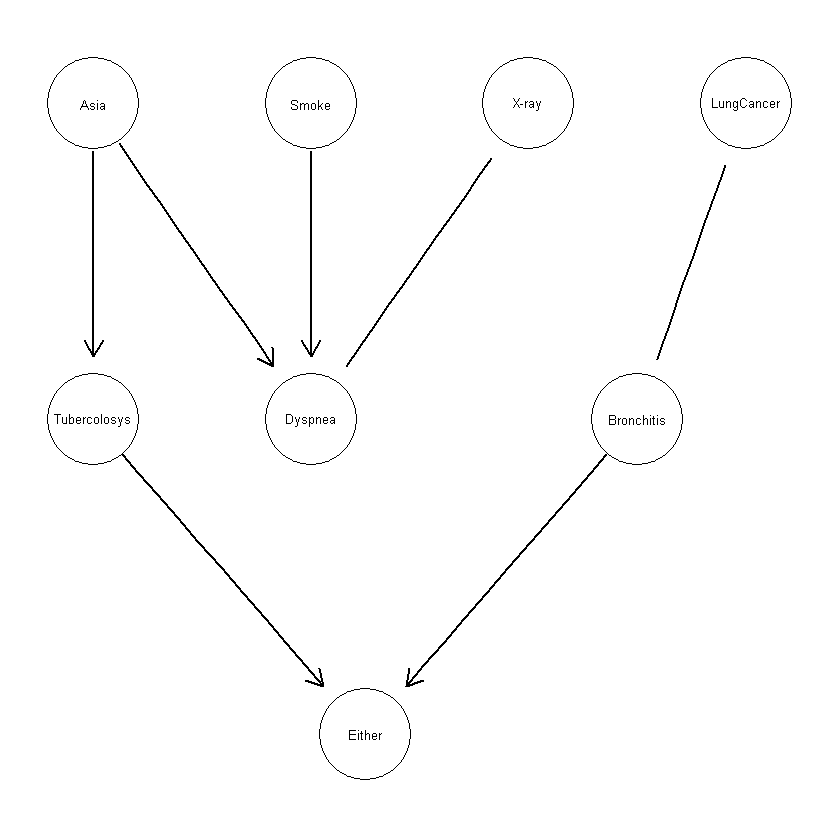

In [44]:
plot(net.2)

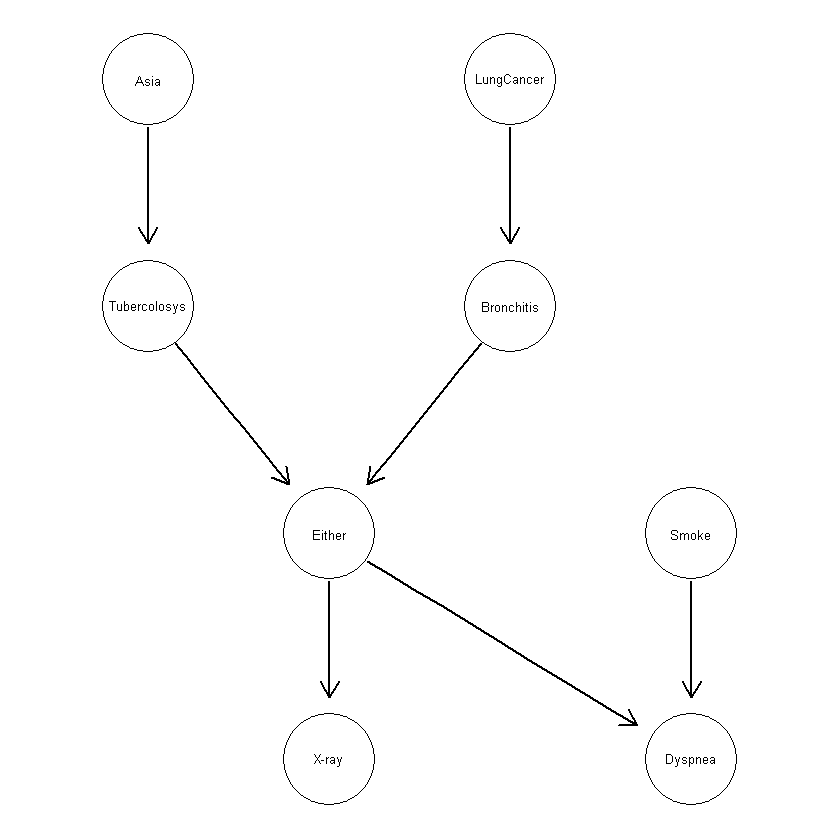

In [45]:
plot(net.3)

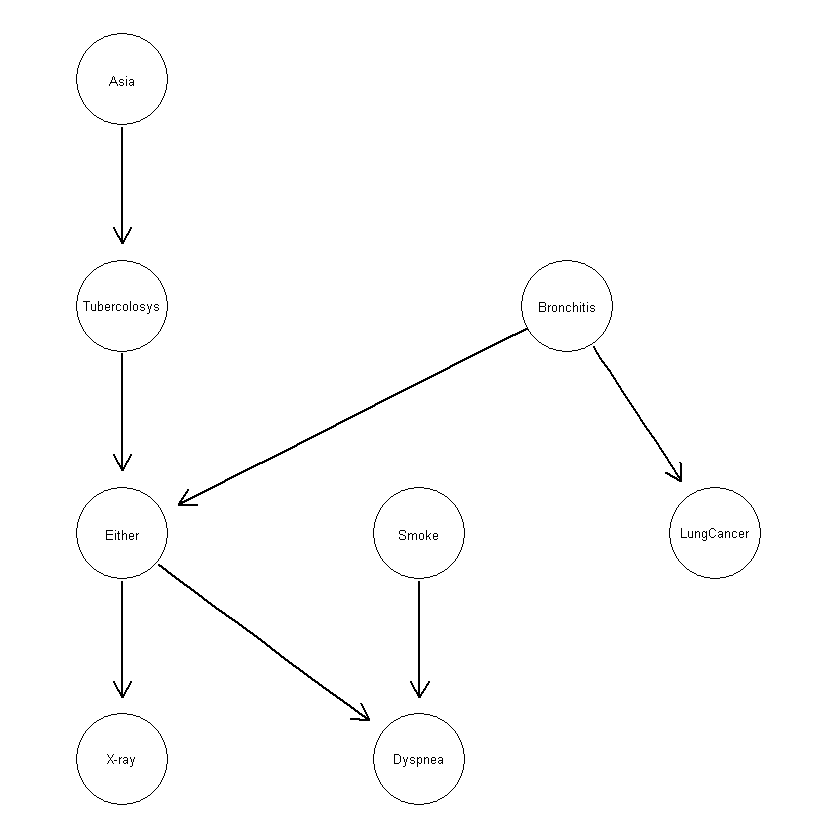

In [46]:
plot(net.4)

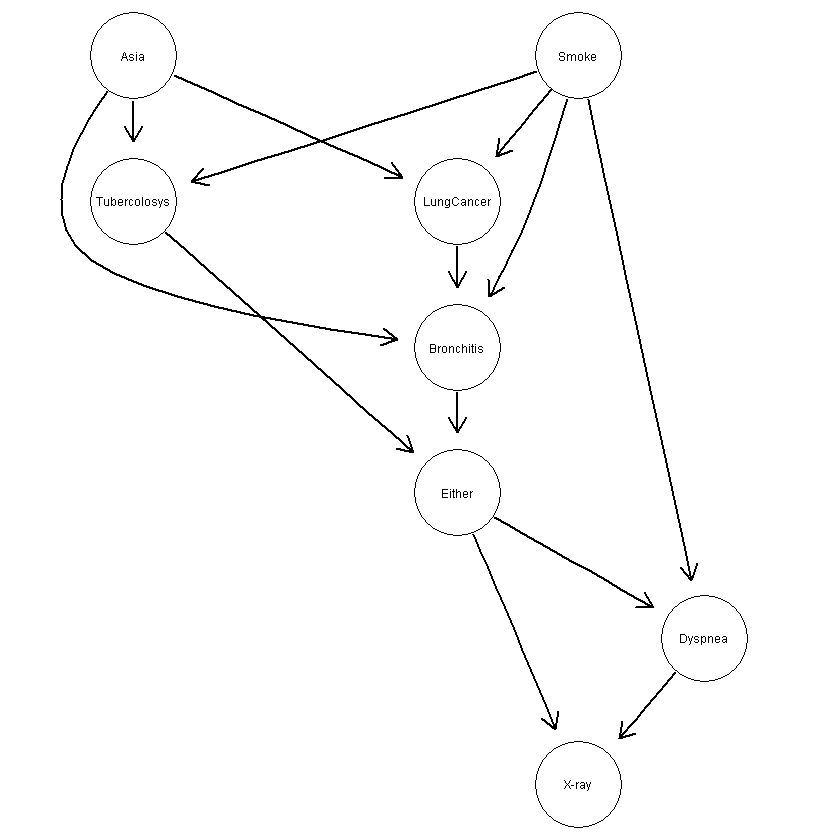

In [47]:
plot(net.5)

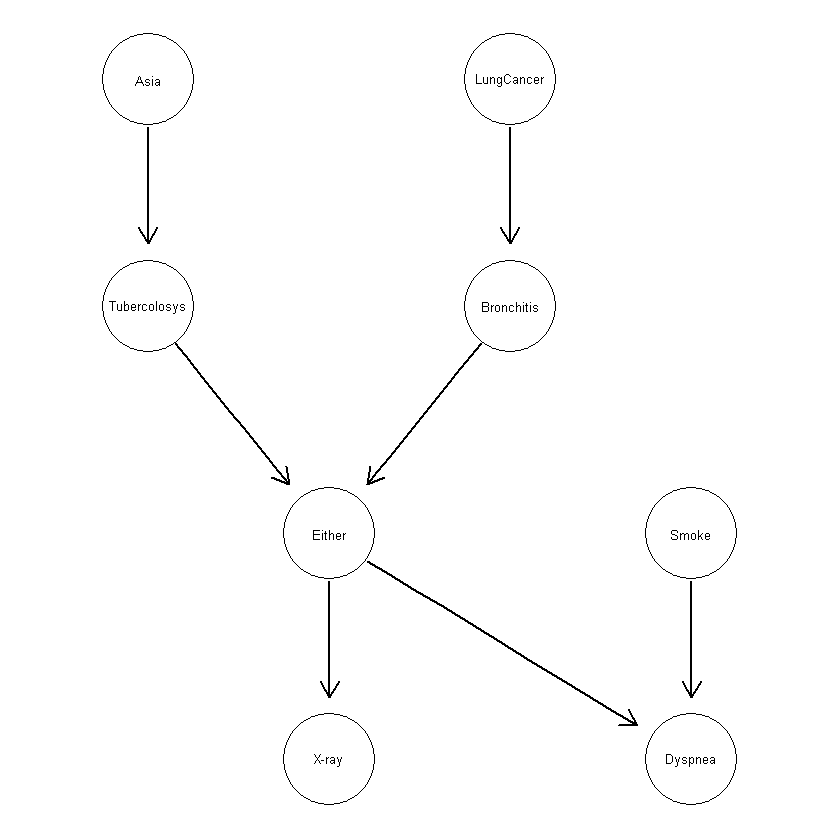

In [48]:
plot(net.6) # almost! smoking -> lung cancer & bronchitis

bnstruct :: Generating bootstrap samples ...
bnstruct :: Bootstrap samples generated.
bnstruct :: learning the structure using SM ...
bnstruct :: learning using SM completed.


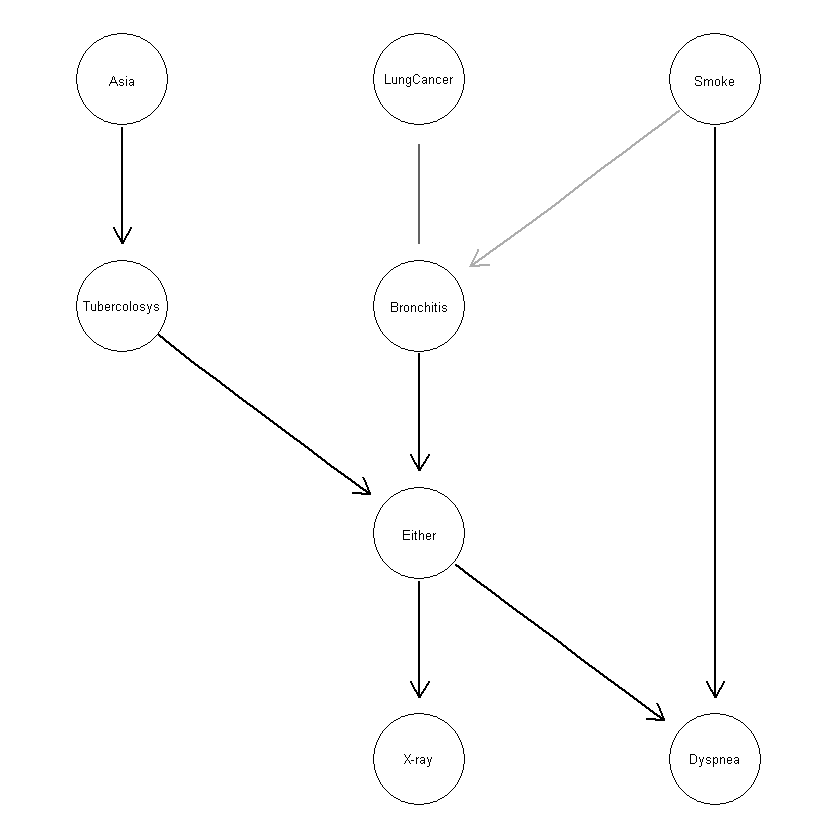

In [50]:
# bootstrap example taken from documentation, almost as wanted!
bn.boot <- bootstrap(bn.dataset, num.boots = 300)
net <- learn.network(bn.boot, bootstrap = TRUE, max.parents = 2, layering = layers, algo = "sm")
plot(net)

In [54]:
wpdag(net)

0,300,0,21,30,0,3,0
0,0,0,40,23,300,8,0
0,1,0,33,94,0,12,300
0,3,0,0,142,0,12,2
0,1,0,186,0,300,5,0
0,0,0,0,0,0,300,300
0,0,0,0,0,0,0,0
0,0,0,0,0,0,2,0


In [31]:
actual.net <- matrix(c(0,1,0,0,0,0,0,0,
                       0,0,0,0,0,1,0,0,
                       0,0,0,1,1,0,0,0,
                       0,0,0,0,0,1,0,0,
                       0,0,0,0,0,0,0,1,
                       0,0,0,0,0,0,1,1,
                       0,0,0,0,0,0,0,0,
                       0,0,0,0,0,0,0,0), nrow = 8, ncol = 8, byrow = TRUE) # actual adjacency matrix 

bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.
bnstruct :: learning the structure using MMHC ...
bnstruct :: learning using MMHC completed.
bnstruct :: learning network parameters ... 


node  1 
node  2 
node  3 
node  4 
node  5 
node  6 
node  7 
node  8 


bnstruct :: parameter learning done.


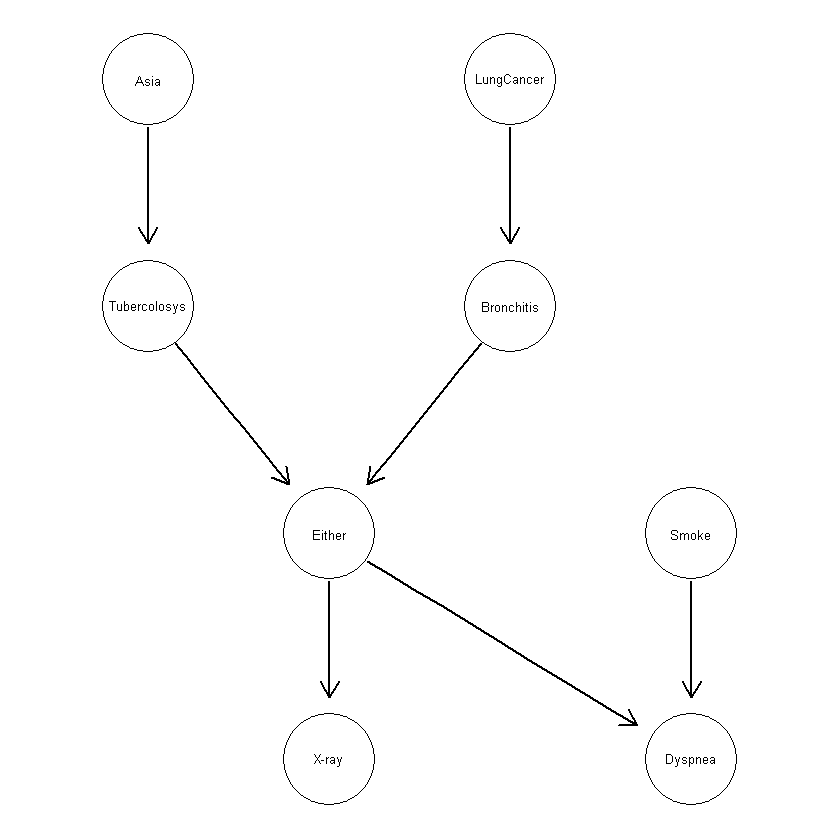

In [59]:
net.final <- learn.network(bn.dataset, initial.network = actual.net, max.parents = 2, layering = layers)
plot(net.final)

## `bnlearn`

In [3]:
library("bnlearn")
library("Rgraphviz")

Warning message:
"package 'bnlearn' was built under R version 3.6.1"
Attaching package: 'bnlearn'

The following objects are masked from 'package:bnstruct':

    impute, read.bif, read.dsc, read.net, shd, write.dsc

The following objects are masked from 'package:igraph':

    compare, degree, path, subgraph

The following object is masked from 'package:stats':

    sigma

Loading required package: graph
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:bnlearn':

    path, score

The following objects are masked from 'package:igraph':

    normalize, path, union

The following object is masked from 'package:Matrix':

    which

The following objects 

In [4]:
citation("bnlearn")


To cite bnlearn in publications use the most appropriate among:

A teaching book about Bayesian networks based on bnlearn:

  Marco Scutari, Jean-Baptiste Denis. (2014) Bayesian Networks with
  Examples in R. Chapman and Hall, Boca Raton. ISBN 978-1-4822-2558-7.

To cite applications of Bayesian networks in genetics and systems
biology you may want to use:

  Radhakrishnan Nagarajan, Marco Scutari, Sophie Lebre. (2013) Bayesian
  Networks in R with Applications in Systems Biology. Springer, New
  York. ISBN 978-1-4614-6445-7.

To cite parallel computing for bnlearn in publications use:

  Marco Scutari (2017). Bayesian Network Constraint-Based Structure
  Learning Algorithms: Parallel and Optimized Implementations in the
  bnlearn R Package. Journal of Statistical Software, 77(2), 1-20.
  doi:10.18637/jss.v077.i02

To cite general use of bnlearn in publications use:

  Marco Scutari (2010). Learning Bayesian Networks with the bnlearn R
  Package. Journal of Statistical Software, 35(3)

In [5]:
# convert BNDataset as regular dataframe
df.bnlearn <- as.data.frame(raw.data(df))
cols <- variables(df)
colnames(df.bnlearn) <- cols
df.bnlearn[,cols] <- data.frame(apply(df.bnlearn[cols], 2, as.factor)) # convert integer to factor 
str(df.bnlearn)

'data.frame':	10000 obs. of  8 variables:
 $ Asia        : Factor w/ 2 levels "1","2": 2 2 1 2 2 2 2 2 2 2 ...
 $ Tubercolosys: Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ Smoke       : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ LungCancer  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Bronchitis  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Either      : Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ X-ray       : Factor w/ 2 levels "1","2": 1 2 2 2 1 2 2 1 1 2 ...
 $ Dyspnea     : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 2 2 1 ...


In [7]:
bn.k2 <- hc(df.bnlearn, score = "k2") # learn network structure with K2 algorithm
bn.k2


  Bayesian network learned via Score-based methods

  model:
   [Tubercolosys][LungCancer][Bronchitis|LungCancer]
   [Either|Tubercolosys:Bronchitis][Dyspnea|Tubercolosys:Bronchitis]
   [Smoke|Tubercolosys:Bronchitis:Dyspnea][X-ray|Either]
   [Asia|Tubercolosys:Smoke]
  nodes:                                 8 
  arcs:                                  11 
    undirected arcs:                     0 
    directed arcs:                       11 
  average markov blanket size:           3.00 
  average neighbourhood size:            2.75 
  average branching factor:              1.38 

  learning algorithm:                    Hill-Climbing 
  score:                                 Cooper & Herskovits' K2 
  tests used in the learning procedure:  175 
  optimized:                             TRUE 


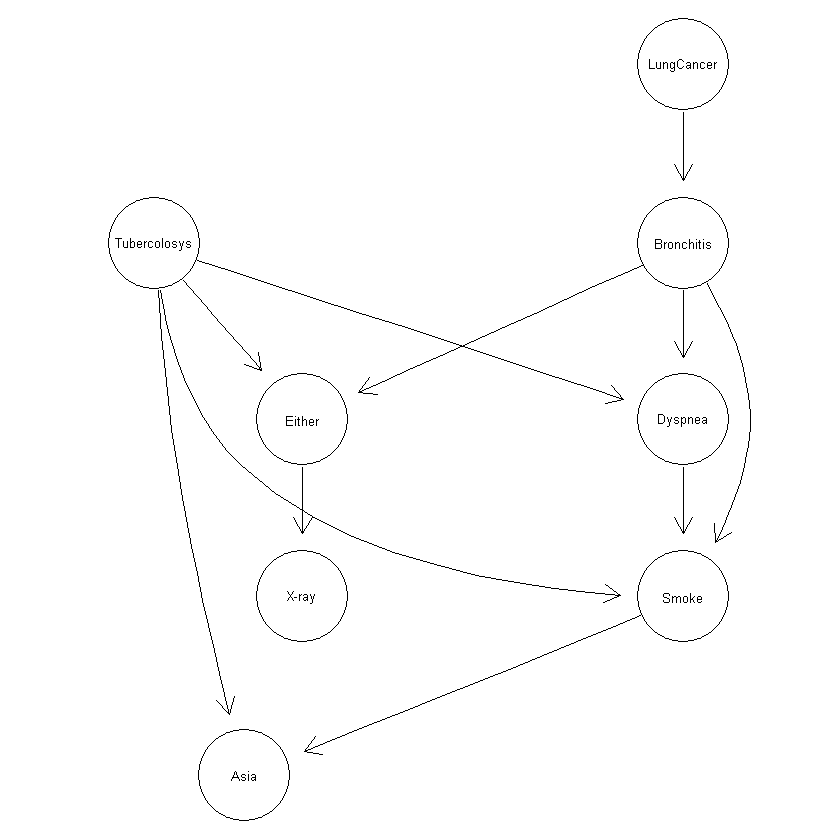

In [8]:
graphviz.plot(bn.k2)

In [12]:
bn.aic <- hc(df.bnlearn, score = "aic")
compare(bn.aic, bn.k2)

$tp
[1] 4

$fp
[1] 7

$fn
[1] 7

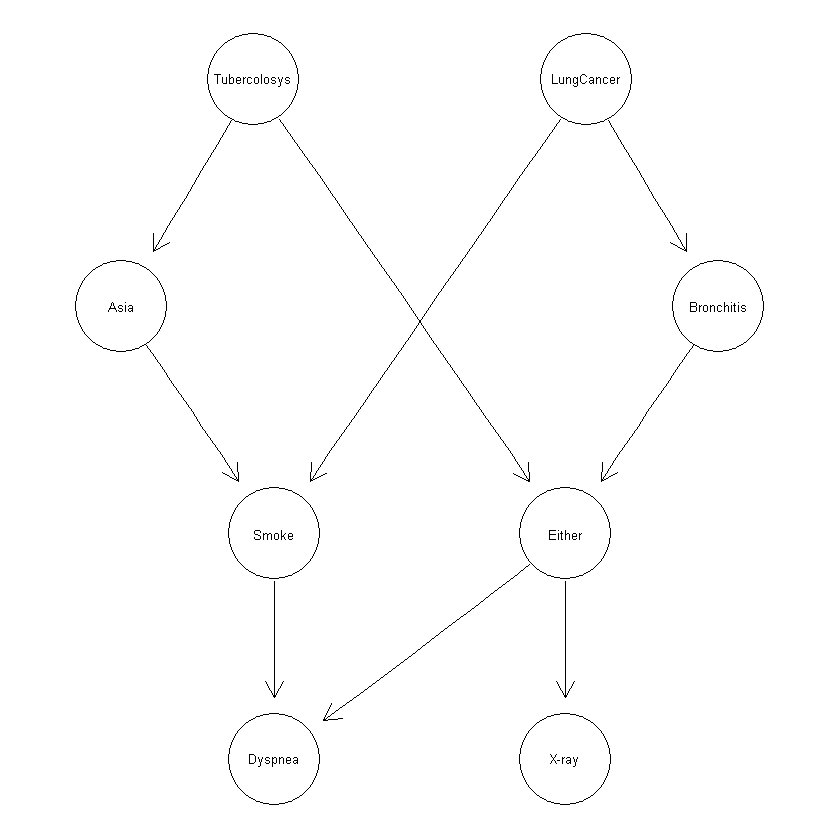

In [15]:
bn.tabu <- tabu(df.bnlearn, score = "k2")
graphviz.plot(bn.tabu)

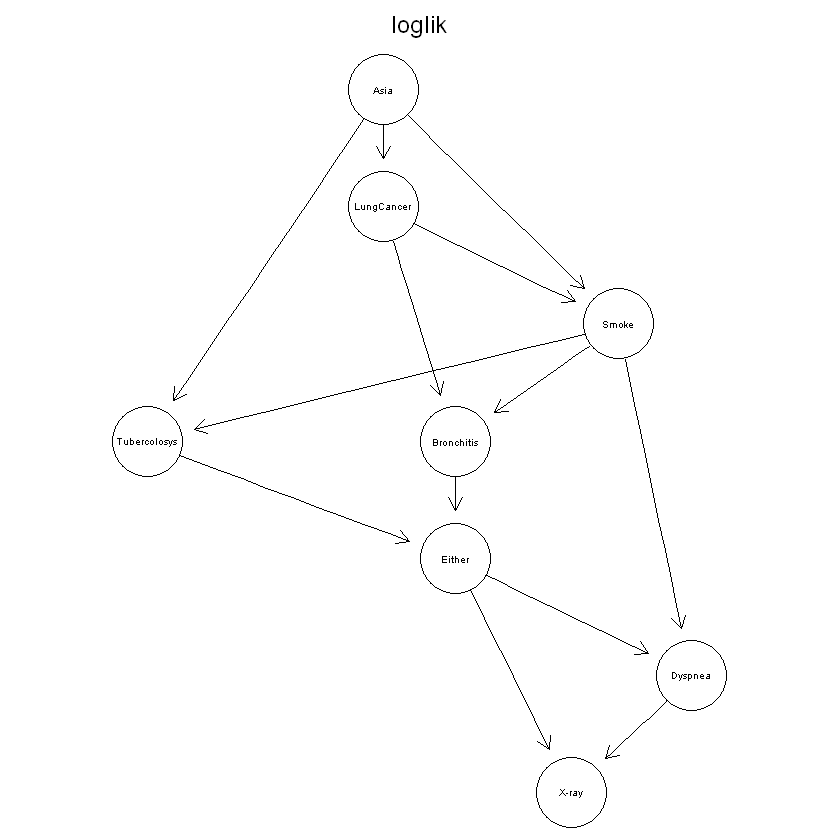

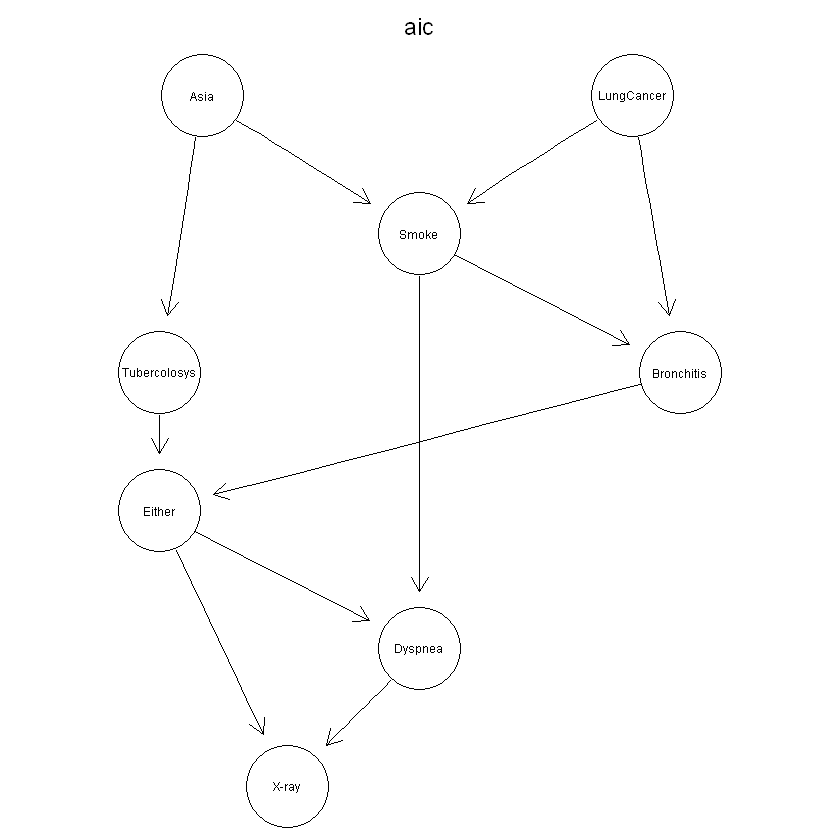

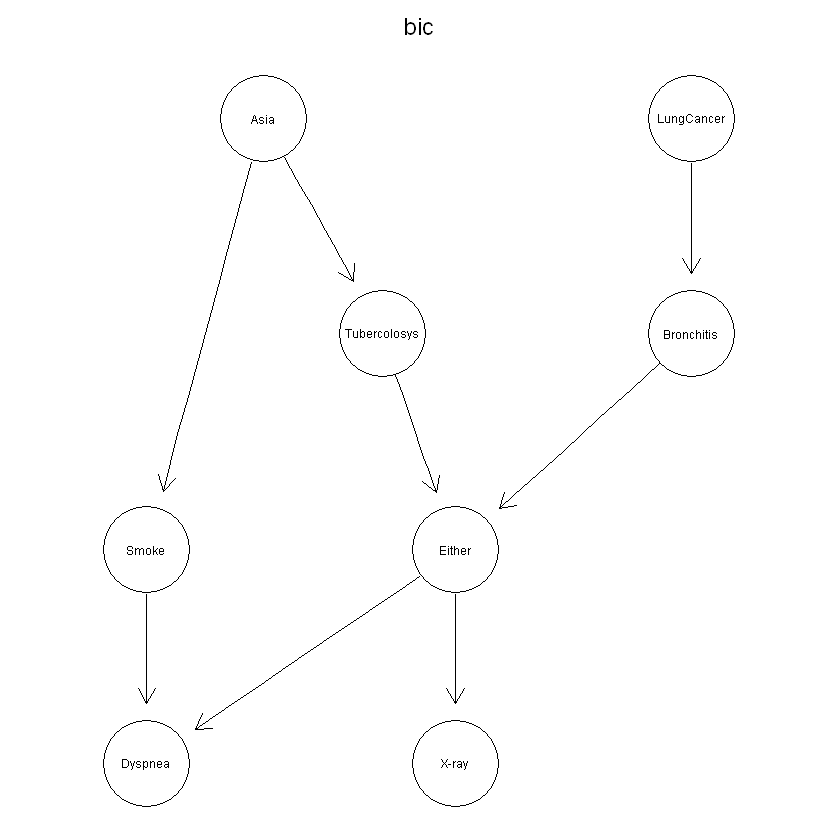

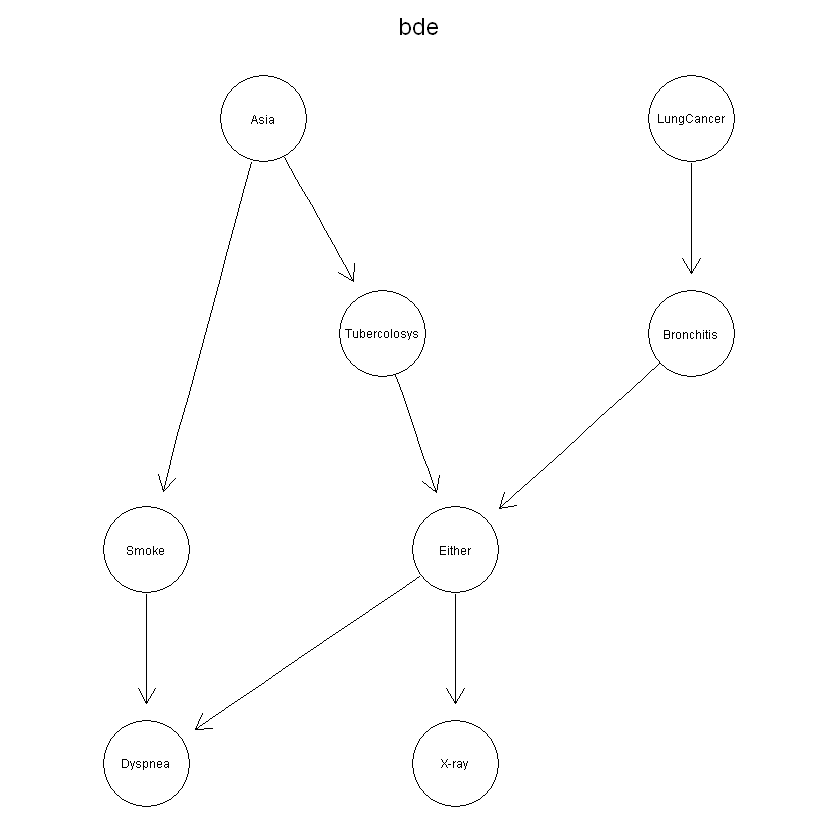

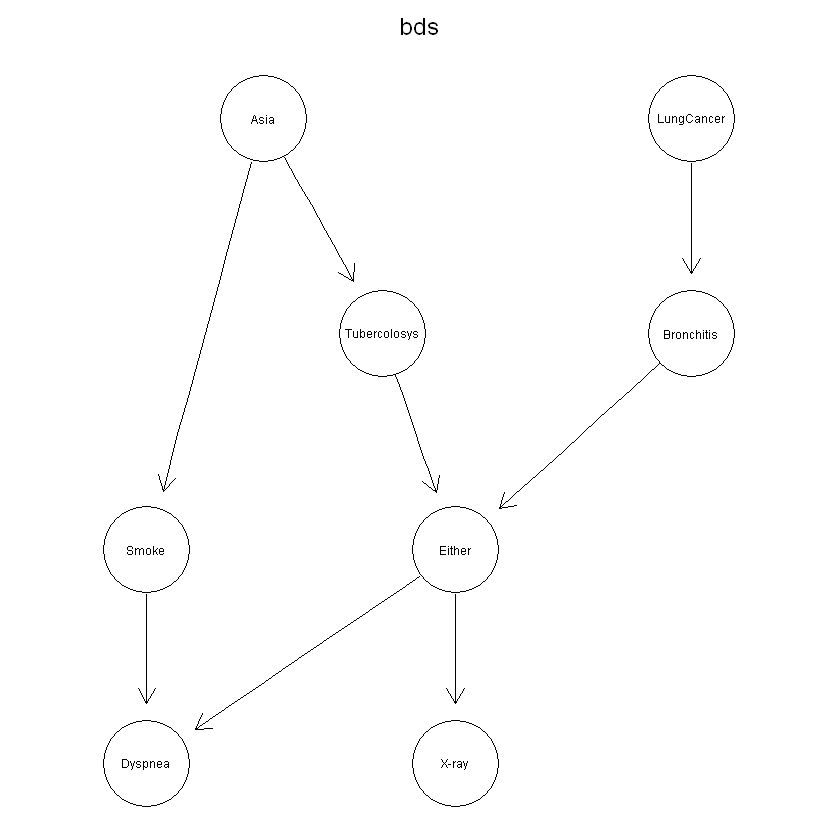

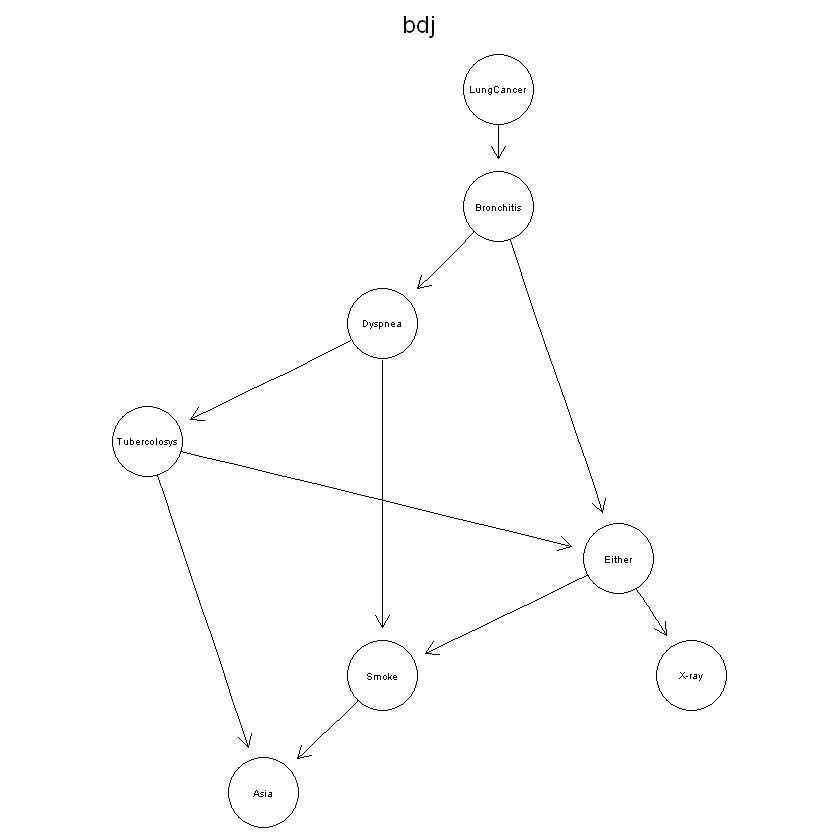

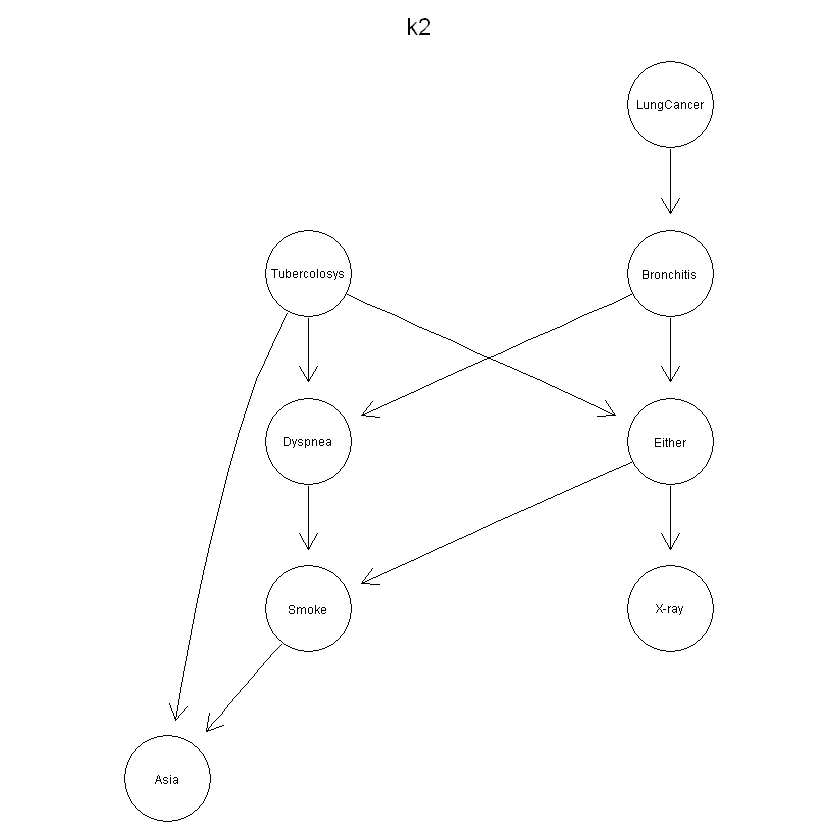

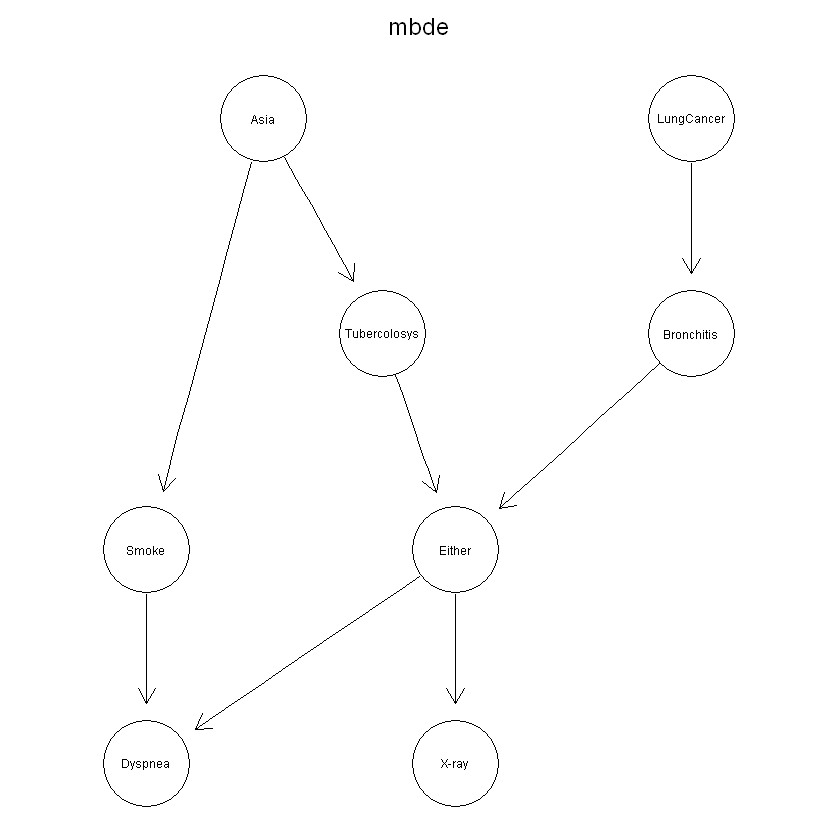

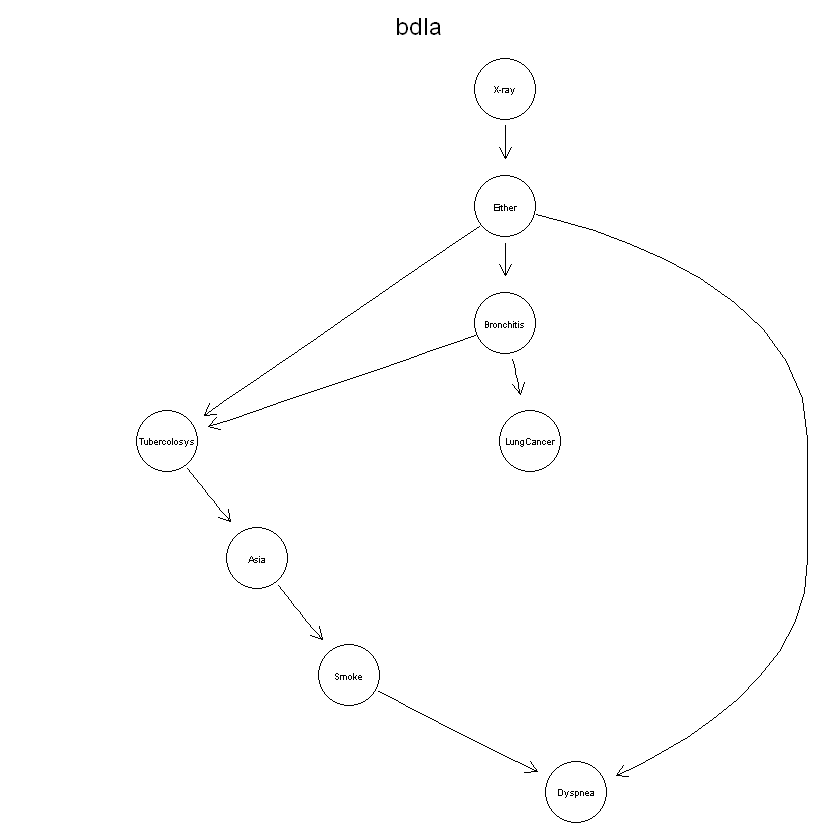

In [30]:
for (i in c("loglik","aic","bic","bde","bds","bdj","k2","mbde","bdla")) {
    graphviz.plot(hc(df.bnlearn, score = i, maxp = 2), main = i)
}

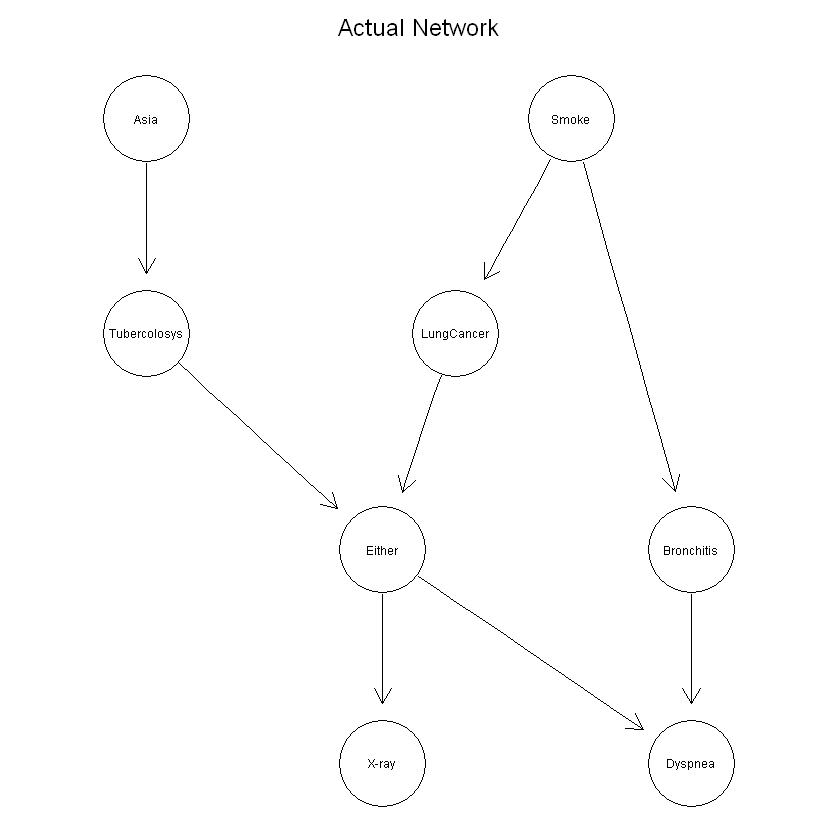

In [42]:
e = empty.graph(cols)
amat(e) = actual.net
graphviz.plot(e, main = "Actual Network")

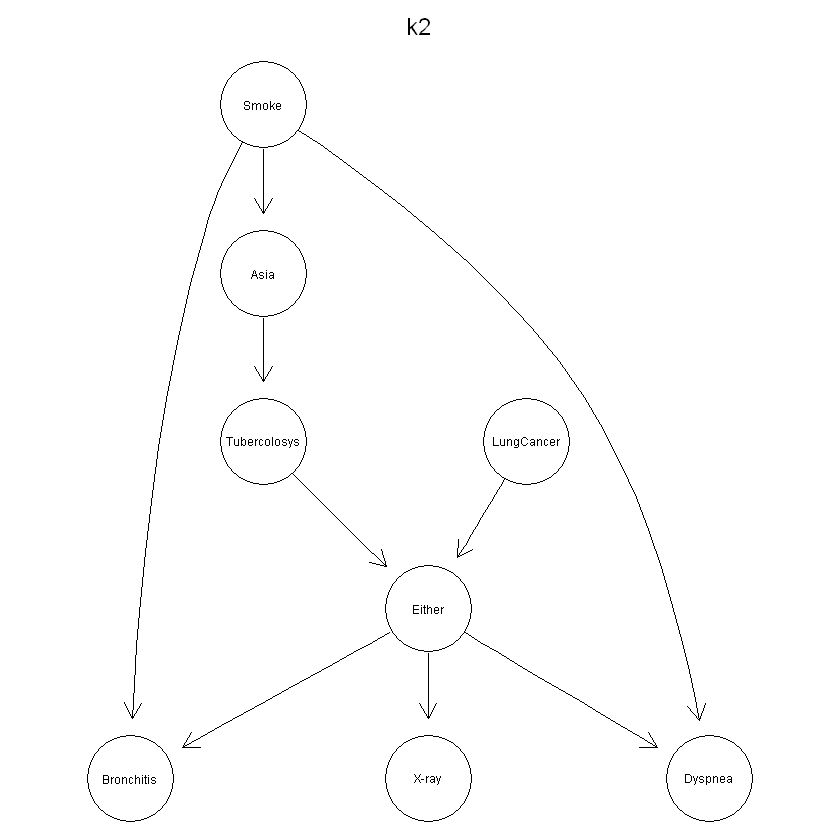

In [48]:
learned.hc <- hc(df.bnlearn, score = "k2", maxp = 2, start = e)
graphviz.plot(learned.hc, main = "k2")

## `Rcpp`

In [7]:
library('Rcpp')

ERROR: Error in library("Rcpp"): there is no package called 'Rcpp'


In [4]:
require('Rcpp')

Loading required package: Rcpp
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'Rcpp'"

In [6]:
install.packages('Rcpp', repo="https://cran.stat.unipd.it/")

package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"


The downloaded binary packages are in
	C:\Users\Paolo\AppData\Local\Temp\RtmpQRgp8H\downloaded_packages


In [2]:
cmpRes <- sourceCpp("rk2alg.cpp")
cmpRes

g++  -I"C:/PROGRA~3/ANACON~1/envs/r_env/lib/R/include" -DNDEBUG   -I"C:/ProgramData/Anaconda3/envs/r_env/Lib/R/library/Rcpp/include" -I"C:/Users/Paolo/Desktop/Exam"   -I"C:/PROGRA~3/ANACON~1/envs/r_env/lib/R/../../Library/mingw-w64/include"     -O2 -Wall  -march=x86-64 -mtune=generic -c rk2alg.cpp -o rk2alg.o


ERROR: Error in sourceCpp("rk2alg.cpp"): Error 1 occurred building shared library.


In [8]:
library('devtools')

Warning message:
"package 'devtools' was built under R version 3.6.1"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.1"Error: package or namespace load failed for 'usethis' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'fs' 1.2.7 is being loaded, but >= 1.3.0 is required


ERROR: Error: package 'usethis' could not be loaded


In [9]:
?sourceCpp

In [22]:
wd <- getwd()

In [59]:
?setwd()

In [11]:
Sys.setlocale(category = "LC_ALL", locale = "English_United States.1252")

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [14]:
Sys.getlocale()

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [17]:
Encoding()

ERROR: Error in Encoding(): argument "x" is missing, with no default


In [19]:
openFile()

ERROR: Error in openFile(): could not find function "openFile"


In [21]:
file.path("rk2alg.cpp")

[1] "rk2alg.cpp"

In [31]:
Encoding(file) <- "UTF-8"

In [32]:
file

[1] "C:/Users/Paolo/OneDrive - Università degli Studi di Padova/R/Exam/rk2alg.cpp"

In [30]:
file <- paste(getwd(), '/rk2alg.cpp',sep = '')

In [28]:
?paste